<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/inpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import cv2
from skimage import io, color, filters, measure


Matrix U (shape: (184, 184)):
[[ 0.043  0.004  0.002 ... -0.022 -0.015 -0.007]
 [ 0.077  0.003  0.001 ...  0.004  0.001  0.035]
 [ 0.076  0.008  0.    ... -0.033  0.     0.022]
 ...
 [ 0.072  0.015 -0.001 ... -0.02   0.005 -0.001]
 [ 0.073  0.019 -0.011 ...  0.009 -0.002 -0.009]
 [ 0.041  0.009 -0.005 ...  0.018  0.008  0.011]]

Singular values (length: 184):
[[87.706  0.     0.    ...  0.     0.     0.   ]
 [ 0.    15.105  0.    ...  0.     0.     0.   ]
 [ 0.     0.    12.355 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.008  0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.006  0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.005]]

Top 10 singular values:
[[87.706  0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    15.105  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    12.355  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     9.612  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.  

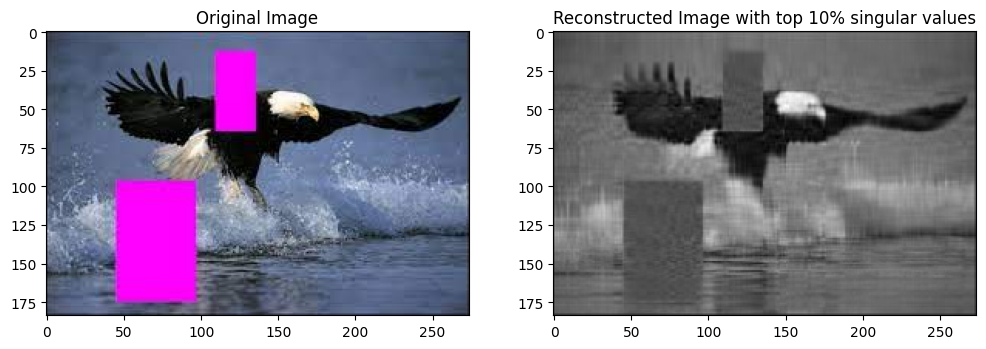


Reconstructed Image Vector (shape: (50416,)):
[0.087 0.158 0.152 ... 0.178 0.185 0.112]


In [ ]:

# Step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.diag(S[:k_values])
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image

# Step 5: Display the original and reconstructed images
def display_images(original_image, reconstructed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[1].imshow(reconstructed_image, cmap='gray')
    axs[1].set_title(f'Reconstructed Image with top {k}% singular values')
    axs[1].axis('on')
    plt.show()

# Step 6: Print matrices and singular values
def print_matrices(U, S, Vt, k):
    np.set_printoptions(precision=3, suppress=True)
    print("Matrix U (shape: {}):".format(U.shape))
    print(U)

    print("\nSingular values (length: {}):".format(len(S)))
    print(np.diag(S))  # Print singular values as a diagonal matrix

    print(f"\nTop {k} singular values:")
    print(np.diag(S[:k]))  # Print top k singular values as a diagonal matrix

    print("\nMatrix Vt (shape: {}):".format(Vt.shape))
    print(Vt)

# Function to convert matrix to vector
def matrix_to_vector(matrix):
    return np.ravel(matrix)



# Main function to execute the steps
def main(image_path, k):
    original_image = read_image(image_path)
    if original_image is None:
        print("Error: Unable to read the image. Please check the path.")
        return
    grayscale_image = convert_to_grayscale(original_image)
    U, S, Vt = perform_svd(grayscale_image)
    print_matrices(U, S, Vt, k)
    reconstructed_image = reconstruct_image(U, S, Vt, k)
    print("\nReconstructed Image Matrix (shape: {}):".format(reconstructed_image.shape))
    print(reconstructed_image)
    display_images(original_image, reconstructed_image, k)
    # Call the function to convert the reconstructed image matrix to a vector
    reconstructed_image_vector = matrix_to_vector(reconstructed_image)
    print("\nReconstructed Image Vector (shape: {}):".format(reconstructed_image_vector.shape))
    print(reconstructed_image_vector)



# Provide the image path and the value of k
image_path = 'df.jpg'  # Replace with your image path
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_path, k)


Reconstructed Image Matrix (shape: (184, 274)):
[[0.087 0.158 0.152 ... 0.183 0.184 0.111]
 [0.153 0.274 0.264 ... 0.321 0.325 0.194]
 [0.155 0.28  0.271 ... 0.314 0.314 0.189]
 ...
 [0.201 0.359 0.343 ... 0.334 0.344 0.21 ]
 [0.202 0.352 0.338 ... 0.337 0.347 0.211]
 [0.106 0.187 0.18  ... 0.178 0.185 0.112]]


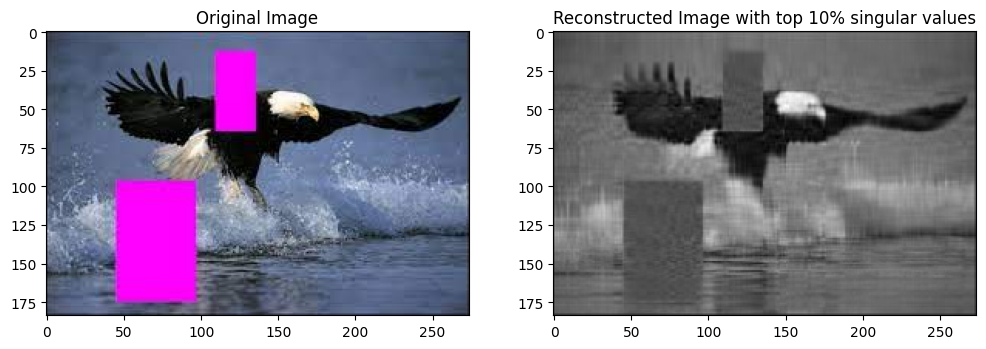

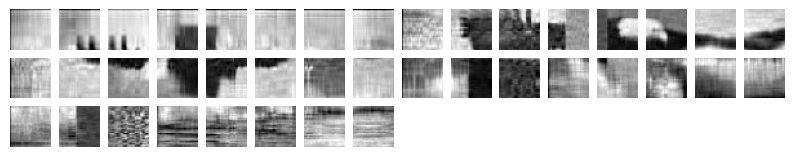

In [ ]:

# Step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.diag(S[:k_values])
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image

# Step 5: Display the original and reconstructed images
def display_images(original_image, reconstructed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[1].imshow(reconstructed_image, cmap='gray')
    axs[1].set_title(f'Reconstructed Image with top {k}% singular values')
    axs[1].axis('on')
    plt.show()


# Function to generate similarity patch from matrix
def generate_similarity_patch_from_matrix(image_matrix, patch_size=(16, 16), patch_position=(100, 100)):
    patch_row, patch_col = patch_position
    patch = image_matrix[patch_row:patch_row + patch_size[0], patch_col:patch_col + patch_size[1]]
    return patch

# Function to display the patch with its shape
def display_patch_with_shape(patch, patch_size):
    plt.imshow(patch, cmap='gray')
    plt.title("Similarity Patch (shape: {})".format(patch_size))
    plt.axis('off')
    plt.show()

# Main function to execute the steps
def main(image_path, k):
    original_image = read_image(image_path)
    if original_image is None:
        print("Error: Unable to read the image. Please check the path.")
        return
    grayscale_image = convert_to_grayscale(original_image)
    U, S, Vt = perform_svd(grayscale_image)

    reconstructed_image = reconstruct_image(U, S, Vt, k)
    print("\nReconstructed Image Matrix (shape: {}):".format(reconstructed_image.shape))
    print(reconstructed_image)
    display_images(original_image, reconstructed_image, k)

    width, height = reconstructed_image.shape[1], reconstructed_image.shape[0]
    count = 0
    patch = []
    for m in range(height//32):
      for n in range(width//32):
         img_crop = reconstructed_image[m*32:(m+1)*32, n*32:(n+1)*32]
         patch.append(img_crop)
         count += 1

    patch = np.asarray(patch)
    plt.figure(figsize=(10, 10))
    for i in range(40):
      plt.subplot(16, 16, i+1)
      plt.imshow(patch[i], cmap='gray')
      plt.axis('off')

    plt.show()

# Provide the image path and the value of k
image_path = 'df.jpg'  # Replace with your image path
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_path, k)


Reconstructed Image Matrix (shape: (184, 274)):
[[0.087 0.158 0.152 ... 0.183 0.184 0.111]
 [0.153 0.274 0.264 ... 0.321 0.325 0.194]
 [0.155 0.28  0.271 ... 0.314 0.314 0.189]
 ...
 [0.201 0.359 0.343 ... 0.334 0.344 0.21 ]
 [0.202 0.352 0.338 ... 0.337 0.347 0.211]
 [0.106 0.187 0.18  ... 0.178 0.185 0.112]]


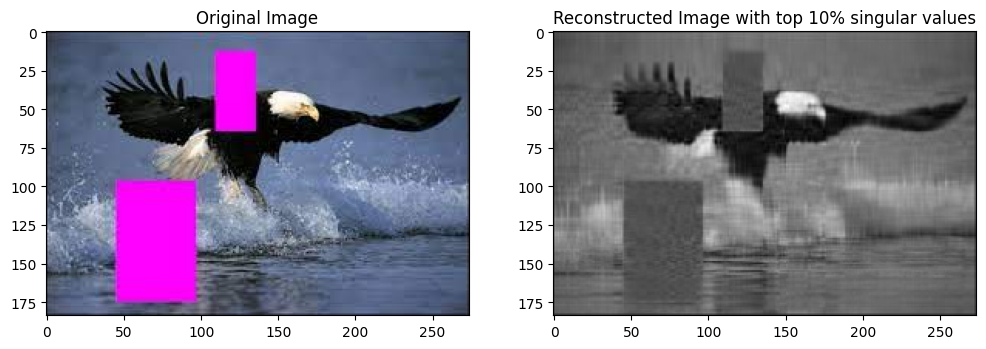

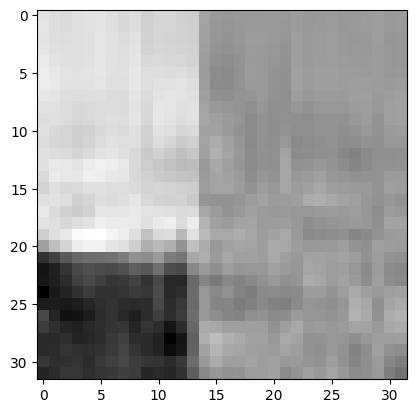

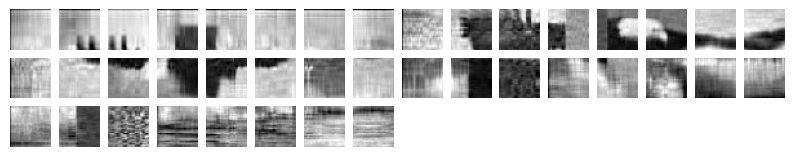

In [ ]:

# Step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.diag(S[:k_values])
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image

# Step 5: Display the original and reconstructed images
def display_images(original_image, reconstructed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[1].imshow(reconstructed_image, cmap='gray')
    axs[1].set_title(f'Reconstructed Image with top {k}% singular values')
    axs[1].axis('on')
    plt.show()

def segmentation(reconstructed_image):
    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(reconstructed_image)
    binary_image = (reconstructed_image > threshold).astype(int)

    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)

    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))
    # Create a mask for the target region
    mask = np.zeros_like(reconstructed_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True
    return reconstructed_image, mask, target_contour

def specify_black_patch(reconstructed_image, target_contour, patch_size=(32, 32)):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Iterate through the target region to find a mostly black patch
    for x in range(x_min, x_max - patch_size[1] + 1, 1):
        for y in range(y_min, y_max - patch_size[0] + 1, 1):
            patch = reconstructed_image[y:y + patch_size[0], x:x + patch_size[1]]
            if np.mean(patch) < 0.3:  # Check if the patch is mostly black (mean pixel value < 0.3)
                return patch

    # If no suitable patch is found, return None
    return None


# Function to generate similarity patch from matrix
def generate_similarity_patch_from_matrix(reconstructed_image,patch, patch_size=(32, 32)):
    patch_row, patch_col = patch
    patch = reconstructed_image[patch_row:patch_row + patch_size[0], patch_col:patch_col + patch_size[1]]
    return patch_s

# Function to display the patch with its shape
def display_patch_with_shape(patch_s, patch_size):
    plt.imshow(patch, cmap='gray')
    plt.title("Similarity Patch (shape: {})".format(patch_size))
    plt.axis('off')
    plt.show()

# Main function to execute the steps
def main(image_path, k):
    original_image = read_image(image_path)
    if original_image is None:
        print("Error: Unable to read the image. Please check the path.")
        return
    grayscale_image = convert_to_grayscale(original_image)
    U, S, Vt = perform_svd(grayscale_image)

    reconstructed_image = reconstruct_image(U, S, Vt, k)
    print("\nReconstructed Image Matrix (shape: {}):".format(reconstructed_image.shape))
    print(reconstructed_image)
    display_images(original_image, reconstructed_image, k)

    grayscale_image, mask, target_contour = segmentation(reconstructed_image)
    black_patch = specify_black_patch(reconstructed_image, target_contour)

    if black_patch is not None:
        # Display the black patch
        import matplotlib.pyplot as plt
        plt.imshow(black_patch, cmap='gray')
        plt.show()
    else:
        print("No suitable black patch found in the target region.")



    width, height = reconstructed_image.shape[1], reconstructed_image.shape[0]
    count = 0
    patch = []
    for m in range(height//32):
      for n in range(width//32):
         img_crop = reconstructed_image[m*32:(m+1)*32, n*32:(n+1)*32]
         patch.append(img_crop)
         count += 1

    patch = np.asarray(patch)
    plt.figure(figsize=(10, 10))
    for i in range(40):
      plt.subplot(16, 16, i+1)
      plt.imshow(patch[i], cmap='gray')
      plt.axis('off')

    plt.show()

# Provide the image path and the value of k
image_path = 'df.jpg' # Replace with your image path
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_path, k)


Reconstructed Image Matrix (shape: (184, 274)):
[[0.087 0.158 0.152 ... 0.183 0.184 0.111]
 [0.153 0.274 0.264 ... 0.321 0.325 0.194]
 [0.155 0.28  0.271 ... 0.314 0.314 0.189]
 ...
 [0.201 0.359 0.343 ... 0.334 0.344 0.21 ]
 [0.202 0.352 0.338 ... 0.337 0.347 0.211]
 [0.106 0.187 0.18  ... 0.178 0.185 0.112]]


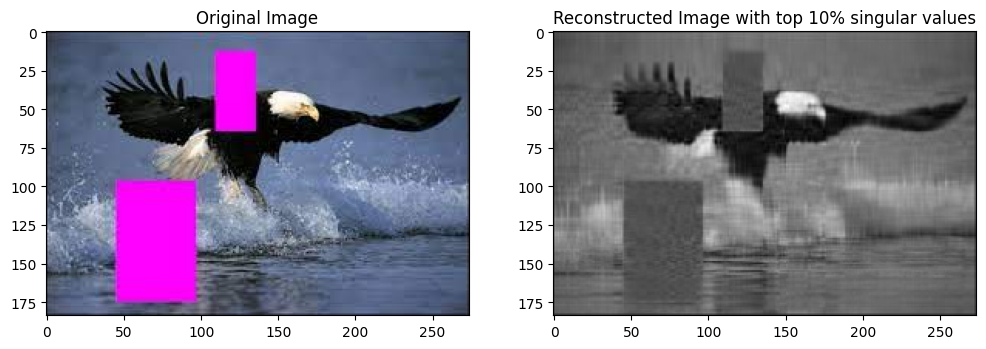

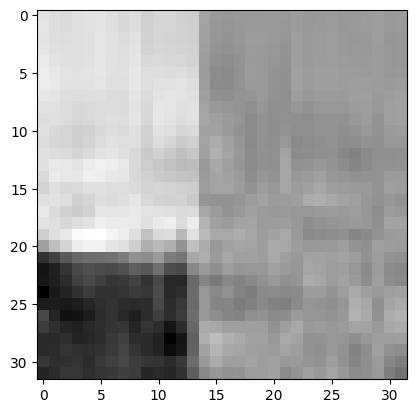

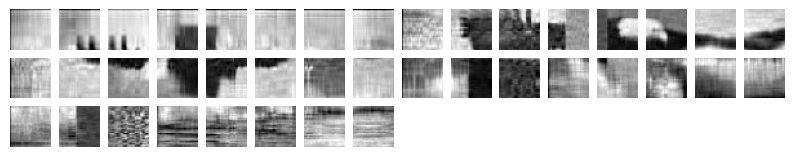

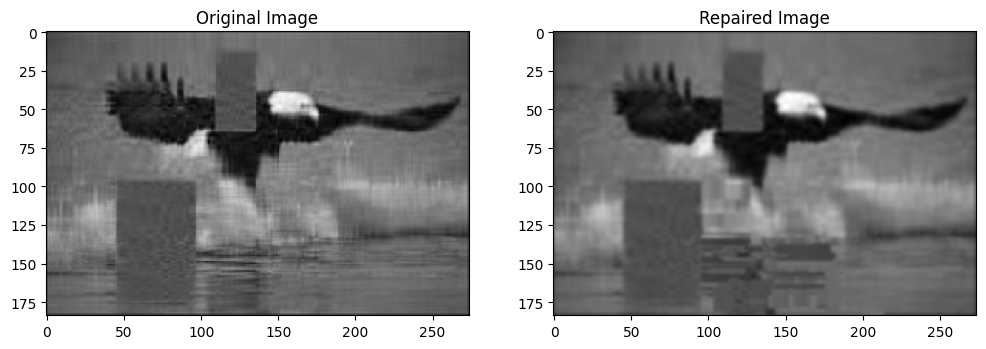

In [ ]:
 #step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.diag(S[:k_values])
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image

# Step 5: Display the original and reconstructed images
def display_images(original_image, reconstructed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[1].imshow(reconstructed_image, cmap='gray')
    axs[1].set_title(f'Reconstructed Image with top {k}% singular values')
    axs[1].axis('on')
    plt.show()

def segmentation(reconstructed_image):
    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(reconstructed_image)
    binary_image = (reconstructed_image > threshold).astype(int)

    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)

    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))
    # Create a mask for the target region
    mask = np.zeros_like(reconstructed_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True
    return reconstructed_image, mask, target_contour

def specify_black_patch(reconstructed_image, target_contour, patch_size=(32, 32)):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Iterate through the target region to find a mostly black patch
    for x in range(x_min, x_max - patch_size[1] + 1, 1):
        for y in range(y_min, y_max - patch_size[0] + 1, 1):
            patch = reconstructed_image[y:y + patch_size[0], x:x + patch_size[1]]
            if np.mean(patch) < 0.3:  # Check if the patch is mostly black (mean pixel value < 0.3)
                return patch

    # If no suitable patch is found, return None
    return None


# Function to generate similarity patch from matrix
def generate_similarity_patch_from_matrix(reconstructed_image,patch, patch_size=(32, 32)):
    patch_row, patch_col = patch
    patch = reconstructed_image[patch_row:patch_row + patch_size[0], patch_col:patch_col + patch_size[1]]
    return patch

# Function to display the patch with its shape
def display_patch_with_shape(patch, patch_size):
    plt.imshow(patch, cmap='gray')
    plt.title("Similarity Patch (shape: {})".format(patch_size))
    plt.axis('off')
    plt.show()


def repair_target_patch(reconstructed_image, target_contour, patch):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Ensure the bounding box is within the image dimensions
    height, width = reconstructed_image.shape
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, width)
    y_max = min(y_max, height)

    # Create a mask for the target region
    target_mask = np.zeros_like(reconstructed_image, dtype=bool)
    target_mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True

    # Repair the target patch using the similar patches
    repaired_image = reconstructed_image.copy()
    for y in range(y_min, y_max):
        for x in range(x_min, x_max):
            if target_mask[y, x]:
                # Find the most similar patch to the target patch
                target_patch = reconstructed_image[y:y+32, x:x+32]
                patch_distances = [np.mean(np.square(target_patch - patch[:target_patch.shape[0], :target_patch.shape[1]])) for patch in patch]
                most_similar_patch = patch[np.argmin(patch_distances)]
                # Copy the most similar patch to the target region
                repaired_image[y:y+target_patch.shape[0], x:x+target_patch.shape[1]] = most_similar_patch[:target_patch.shape[0], :target_patch.shape[1]]

    # Apply Gaussian smoothing to blend the repaired region
    repaired_image = gaussian_filter(repaired_image, sigma=1.0)
    return repaired_image

# Main function to execute the steps
def main(image_path, k):
    original_image = read_image(image_path)
    if original_image is None:
        print("Error: Unable to read the image. Please check the path.")
        return
    grayscale_image = convert_to_grayscale(original_image)
    U, S, Vt = perform_svd(grayscale_image)

    reconstructed_image = reconstruct_image(U, S, Vt, k)
    print("\nReconstructed Image Matrix (shape: {}):".format(reconstructed_image.shape))
    print(reconstructed_image)
    display_images(original_image, reconstructed_image, k)

    grayscale_image, mask, target_contour = segmentation(reconstructed_image)
    black_patch = specify_black_patch(reconstructed_image, target_contour)

    if black_patch is not None:
        # Display the black patch
        import matplotlib.pyplot as plt
        plt.imshow(black_patch, cmap='gray')
        plt.show()
    else:
        print("No suitable black patch found in the target region.")



    width, height = reconstructed_image.shape[1], reconstructed_image.shape[0]
    count = 0
    patch = []
    for m in range(height//32):
      for n in range(width//32):
         img_crop = reconstructed_image[m*32:(m+1)*32, n*32:(n+1)*32]
         patch.append(img_crop)
         count += 1

    patch = np.asarray(patch)
    plt.figure(figsize=(10, 10))
    for i in range(40):
      plt.subplot(16, 16, i+1)
      plt.imshow(patch[i], cmap='gray')
      plt.axis('off')

    plt.show()
    # Reference patch (replace this with your desired reference patch)
    reference_patch = np.zeros((32, 32))
    repaired_image = repair_target_patch(reconstructed_image, target_contour, patch)
     # Display the original and repaired images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(grayscale_image, cmap='gray')
    ax1.set_title('Original Image')
    ax2.imshow(repaired_image, cmap='gray')
    ax2.set_title('Repaired Image')
    plt.show()

# Provide the image path and the value of k
image_path = 'df.jpg' # Replace with your image path
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_path, k)


Reconstructed Image Matrix (shape: (184, 274)):
[[0.087 0.158 0.152 ... 0.183 0.184 0.111]
 [0.153 0.274 0.264 ... 0.321 0.325 0.194]
 [0.155 0.28  0.271 ... 0.314 0.314 0.189]
 ...
 [0.201 0.359 0.343 ... 0.334 0.344 0.21 ]
 [0.202 0.352 0.338 ... 0.337 0.347 0.211]
 [0.106 0.187 0.18  ... 0.178 0.185 0.112]]


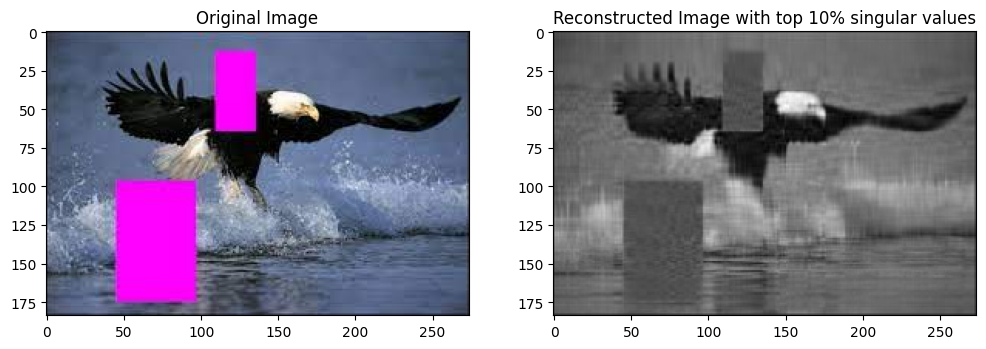

<ipython-input-73-d17395c15642>:130: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(black_patch, cmap='gray')


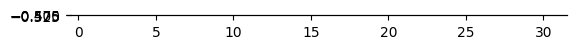

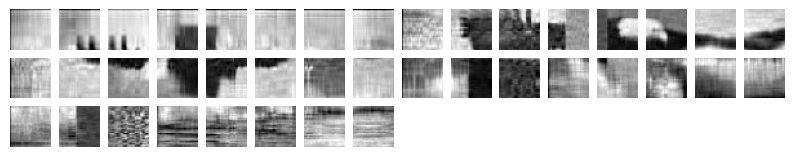

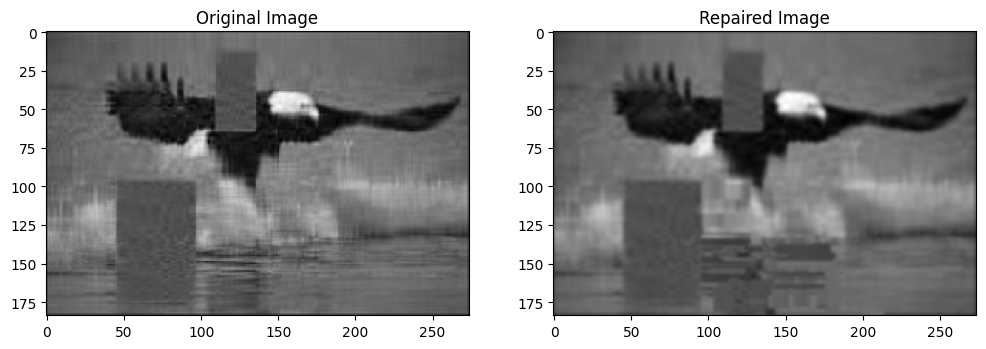

In [ ]:
 #Step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
def convert_to_grayscale(image):
    grayscale_image = color.rgb2gray(image)
    return grayscale_image

# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt

# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.diag(S[:k_values])
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image

# Step 5: Display the original and reconstructed images
def display_images(original_image, reconstructed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[1].imshow(reconstructed_image, cmap='gray')
    axs[1].set_title(f'Reconstructed Image with top {k}% singular values')
    axs[1].axis('on')
    plt.show()

def segmentation(reconstructed_image):
    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(reconstructed_image)
    binary_image = (reconstructed_image > threshold).astype(int)

    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)

    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))
    # Create a mask for the target region
    mask = np.zeros_like(reconstructed_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True
    return reconstructed_image, mask, target_contour

# Function to find a suitable rectangular black patch within the target contour
def specify_black_patch(reconstructed_image, target_contour, patch_size=(32, 32)):
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    for x in range(x_min, x_max - patch_size[1] + 1):
        for y in range(y_min, y_max - patch_size[0] + 1):
            if np.all(reconstructed_image[y:y+patch_size[0], x:x+patch_size[1]] < 0.2):
                return reconstructed_image[y:y+patch_size[0], x:x+patch_size[1]]

    return None

# Function to generate similarity patch from matrix
def generate_similarity_patch_from_matrix(reconstructed_image,patch, patch_size=(32, 32)):
    patch_row, patch_col = patch
    patch = reconstructed_image[patch_row:patch_row + patch_size[0], patch_col:patch_col + patch_size[1]]
    return patch

# Function to display the patch with its shape
def display_patch_with_shape(patch, patch_size):
    plt.imshow(patch, cmap='gray')
    plt.title("Similarity Patch (shape: {})".format(patch_size))
    plt.axis('off')
    plt.show()


def repair_target_patch(reconstructed_image, target_contour, patch):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Ensure the bounding box is within the image dimensions
    height, width = reconstructed_image.shape
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, width)
    y_max = min(y_max, height)

    # Create a mask for the target region
    target_mask = np.zeros_like(reconstructed_image, dtype=bool)
    target_mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True

    # Repair the target patch using the similar patches
    repaired_image = reconstructed_image.copy()
    for y in range(y_min, y_max):
        for x in range(x_min, x_max):
            if target_mask[y, x]:
                # Find the most similar patch to the target patch
                target_patch = reconstructed_image[y:y+32, x:x+32]
                patch_distances = [np.mean(np.square(target_patch - patch[:target_patch.shape[0], :target_patch.shape[1]])) for patch in patch]
                most_similar_patch = patch[np.argmin(patch_distances)]
                # Copy the most similar patch to the target region
                repaired_image[y:y+target_patch.shape[0], x:x+target_patch.shape[1]] = most_similar_patch[:target_patch.shape[0], :target_patch.shape[1]]

    # Apply Gaussian smoothing to blend the repaired region
    repaired_image = gaussian_filter(repaired_image, sigma=1.0)
    return repaired_image

# Main function to execute the steps
def main(image_path, k):
    original_image = read_image(image_path)
    if original_image is None:
        print("Error: Unable to read the image. Please check the path.")
        return
    grayscale_image = convert_to_grayscale(original_image)
    U, S, Vt = perform_svd(grayscale_image)

    reconstructed_image = reconstruct_image(U, S, Vt, k)
    print("\nReconstructed Image Matrix (shape: {}):".format(reconstructed_image.shape))
    print(reconstructed_image)
    display_images(original_image, reconstructed_image, k)

    grayscale_image, mask, target_contour = segmentation(reconstructed_image)
    black_patch = specify_black_patch(reconstructed_image, target_contour)

    if black_patch is not None:
        # Display the black patch
        import matplotlib.pyplot as plt
        plt.imshow(black_patch, cmap='gray')
        plt.show()
    else:
        print("No suitable black patch found in the target region.")



    width, height = reconstructed_image.shape[1], reconstructed_image.shape[0]
    count = 0
    patch = []
    for m in range(height//32):
      for n in range(width//32):
         img_crop = reconstructed_image[m*32:(m+1)*32, n*32:(n+1)*32]
         patch.append(img_crop)
         count += 1

    patch = np.asarray(patch)
    plt.figure(figsize=(10, 10))
    for i in range(40):
      plt.subplot(16, 16, i+1)
      plt.imshow(patch[i], cmap='gray')
      plt.axis('off')

    plt.show()
    # Reference patch (replace this with your desired reference patch)
    reference_patch = np.zeros((32, 32))
    repaired_image = repair_target_patch(reconstructed_image, target_contour, patch)
     # Display the original and repaired images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(grayscale_image, cmap='gray')
    ax1.set_title('Original Image')
    ax2.imshow(repaired_image, cmap='gray')
    ax2.set_title('Repaired Image')
    plt.show()

# Provide the image path and the value of k
image_path = 'df.jpg' # Replace with your image path
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_path, k)

In [ ]:
from PIL import Image

def create_mask(image, threshold=20):
    mask = Image.new('L', image.size)  # Create a new grayscale image for the mask
    pixels = image.load()

    target_color = image.getpixel((0, 0))  # Get the color of the top-left pixel as the target color
    for y in range(image.size[1]):
        for x in range(image.size[0]):
            pixel = pixels[x, y]
            if abs(pixel - target_color) < threshold:
                mask.putpixel((x, y), 255)  # Set the pixel in the mask to white

    return mask

# Load the input image
image = Image.open('df.jpg').convert('L')  # Convert the image to grayscale

# Create the mask for areas of uniform color in the image
mask = create_mask(image)

# Display the mask
mask.show()

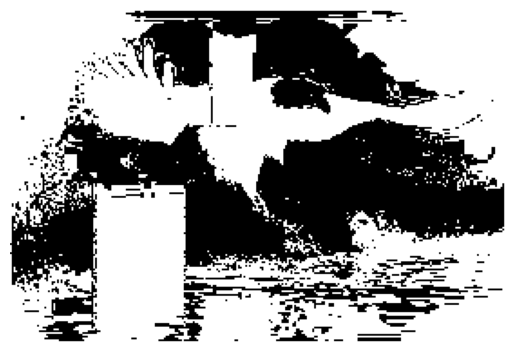

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def create_mask(image, threshold=96):
    mask = Image.new('L', image.size)  # Create a new grayscale image for the mask
    pixels = image.load()

    target_color = image.getpixel((0, 0))  # Get the color of the top-left pixel as the target color
    for y in range(image.size[1]):
        for x in range(image.size[0]):
            pixel = pixels[x, y]
            if abs(pixel - target_color) < threshold:
                mask.putpixel((x, y), 255)  # Set the pixel in the mask to white

    return mask

# Load the input image
image = Image.open('df.jpg').convert('L')  # Convert the image to grayscale

# Create the mask for areas of uniform color in the image
mask = create_mask(image)

# Convert the mask to a numpy array for plotting
mask_array = np.array(mask)

# Display the mask using matplotlib.pyplot
plt.imshow(mask_array, cmap='gray')
plt.axis('off')
plt.show()

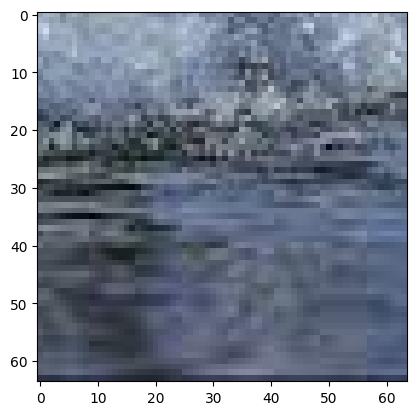

In [ ]:
def segmentation(image_path):
    # Read the image
    image = io.imread(image_path)

    # Convert the image to grayscale
    grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(grayscale_image)
    binary_image = (grayscale_image > threshold).astype(int)

    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)

    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))

    # Create a mask for the target region
    mask = np.zeros_like(image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True

    return mask, target_contour

def specify_patch(image, target_contour, patch_size=(64, 64), patch_position=(100, 100)):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Ensure the patch is within the image boundaries
    patch_x = max(0, min(x_min + patch_position[0], image.shape[1] - patch_size[1]))
    patch_y = max(0, min(y_min + patch_position[1], image.shape[0] - patch_size[0]))

    # Extract the patch from the image
    patch = image[patch_y:patch_y + patch_size[0], patch_x:patch_x + patch_size[1]]

    return patch

# Example usage
image_path = 'df.jpg'
mask, target_contour = segmentation(image_path)
patch = specify_patch(io.imread(image_path), target_contour)

# Display the patch
import matplotlib.pyplot as plt
plt.imshow(patch)
plt.show()


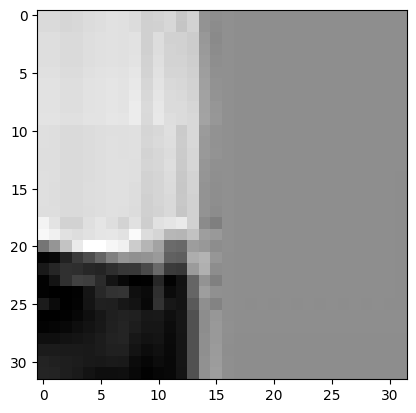

In [ ]:
import numpy as np
from skimage import io, color, filters, measure

def segmentation(image_path):
    # Read the image
    image = io.imread(image_path)

    # Convert the image to grayscale
    grayscale_image = color.rgb2gray(image)

    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(grayscale_image)
    binary_image = (grayscale_image > threshold).astype(int)

    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)

    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))

    # Create a mask for the target region
    mask = np.zeros_like(grayscale_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True

    return grayscale_image, mask, target_contour

def specify_black_patch(image, target_contour, patch_size=(32, 32)):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Iterate through the target region to find a mostly black patch
    for x in range(x_min, x_max - patch_size[1] + 1, 1):
        for y in range(y_min, y_max - patch_size[0] + 1, 1):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            if np.mean(patch) < 0.3:  # Check if the patch is mostly black (mean pixel value < 0.3)
                return patch

    # If no suitable patch is found, return None
    return None

# Example usage
image_path = 'df.jpg'
grayscale_image, mask, target_contour = segmentation(image_path)
black_patch = specify_black_patch(grayscale_image, target_contour)

if black_patch is not None:
    # Display the black patch
    import matplotlib.pyplot as plt
    plt.imshow(black_patch, cmap='gray')
    plt.show()
else:
    print("No suitable black patch found in the target region.")


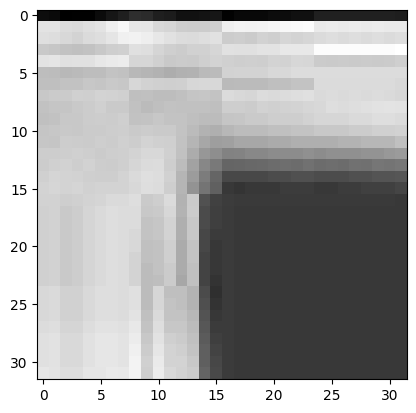

In [ ]:
import numpy as np
from skimage import io, color, filters, measure
import matplotlib.pyplot as plt

def segmentation(image_path):
    # Read the image
    image = io.imread(image_path)
    # Convert the image to grayscale
    grayscale_image = color.rgb2gray(image)
    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(grayscale_image)
    binary_image = (grayscale_image > threshold).astype(int)
    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)
    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))
    # Create a mask for the target region
    mask = np.zeros_like(grayscale_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True
    return grayscale_image, mask, target_contour

def specify_similar_patch(image, target_contour, reference_patch, similarity_threshold=0.7):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)
    # Iterate through the target region to find a similar patch
    for x in range(x_min, x_max - reference_patch.shape[1] + 1):
        for y in range(y_min, y_max - reference_patch.shape[0] + 1):
            patch = image[y:y + reference_patch.shape[0], x:x + reference_patch.shape[1]]
            # Calculate similarity using mean squared error
            mse = np.mean((patch - reference_patch) ** 2)
            if mse < similarity_threshold:
                return patch
    # If no suitable patch is found, return None
    return None

# Example usage
image_path = 'df.jpg'
grayscale_image, mask, target_contour = segmentation(image_path)

# Reference patch (replace this with your desired reference patch)
reference_patch = np.zeros((32, 32))

similar_patch = specify_similar_patch(grayscale_image, target_contour, reference_patch)

if similar_patch is not None:
    # Display the similar patch
    plt.imshow(similar_patch, cmap='gray')
    plt.show()
else:
    print("No similar patch found in the target region.")

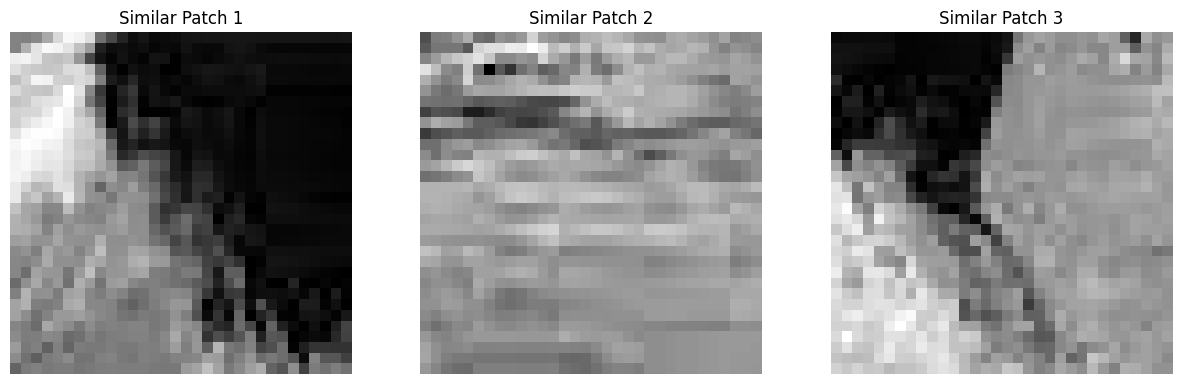

In [ ]:
import numpy as np
from skimage import io, color, filters, measure
import matplotlib.pyplot as plt

def segmentation(image_path):
    # Read the image
    image = io.imread(image_path)
    # Convert the image to grayscale
    grayscale_image = color.rgb2gray(image)
    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(grayscale_image)
    binary_image = (grayscale_image > threshold).astype(int)
    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)
    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))
    # Create a mask for the target region
    mask = np.zeros_like(grayscale_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True
    return grayscale_image, mask, target_contour

def specify_similar_patches(image, target_contour, reference_patch, similarity_threshold=0.7, radius=20, num_patches=5):
    similar_patches = []
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)
    # Iterate through the target region to find similar patches
    for _ in range(num_patches):
        x = np.random.randint(x_min - radius, x_max - reference_patch.shape[1] + radius)
        y = np.random.randint(y_min - radius, y_max - reference_patch.shape[0] + radius)
        patch = image[y:y + reference_patch.shape[0], x:x + reference_patch.shape[1]]
        # Calculate similarity using mean squared error
        if patch.shape == reference_patch.shape:
            mse = np.mean(np.square(patch - reference_patch))
            if mse < similarity_threshold:
                similar_patches.append(patch)
    # If no suitable patch is found, return None
    return similar_patches

# Example usage
image_path = 'df.jpg'
grayscale_image, mask, target_contour = segmentation(image_path)

# Reference patch (replace this with your desired reference patch)
reference_patch = np.zeros((32, 32))

similar_patches = specify_similar_patches(grayscale_image, target_contour, reference_patch)

if similar_patches:
    # Display the similar patches
    num_patches = len(similar_patches)
    fig, axes = plt.subplots(1, num_patches, figsize=(num_patches * 5, 5))
    for i, patch in enumerate(similar_patches):
        axes[i].imshow(patch, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Similar Patch {i+1}')
    plt.show()
else:
    print("No similar patches found in the target region.")


In [ ]:
import numpy as np
from skimage import io, color, filters, measure
import matplotlib.pyplot as plt

def segmentation(image_path):
    # Read the image
    image = io.imread(image_path)
    # Convert the image to grayscale
    grayscale_image = color.rgb2gray(image)
    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(grayscale_image)
    binary_image = (grayscale_image > threshold).astype(int)
    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)
    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))
    # Create a mask for the target region
    mask = np.zeros_like(grayscale_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True
    return grayscale_image, mask, target_contour

def specify_similar_patches(image, target_contour, reference_patch, similarity_threshold=0.7, radius=20, num_patches=5):
    similar_patches = []
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)
    # Iterate through the target region to find similar patches
    for _ in range(num_patches):
        x = np.random.randint(x_min - radius, x_max - reference_patch.shape[1] + radius)
        y = np.random.randint(y_min - radius, y_max - reference_patch.shape[0] + radius)
        patch = image[y:y + reference_patch.shape[0], x:x + reference_patch.shape[1]]
        # Calculate similarity using mean squared error
        if patch.shape == reference_patch.shape:
            mse = np.mean(np.square(patch - reference_patch))
            if mse < similarity_threshold:
                similar_patches.append(patch)
    # If no suitable patch is found, return an empty list
    return similar_patches

# Example usage
image_path = '22.png'
grayscale_image, mask, target_contour = segmentation(image_path)

# Reference patch (replace this with your desired reference patch)
reference_patch = np.zeros((32, 32))

similar_patches = specify_similar_patches(grayscale_image, target_contour, reference_patch)

if similar_patches:
    print(f"Found {len(similar_patches)} similar patches:")
    # Display the similar patches
    num_patches = len(similar_patches)
    fig, axes = plt.subplots(1, num_patches, figsize=(num_patches * 5, 5))
    for i, patch in enumerate(similar_patches):
        axes[i].imshow(patch, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Similar Patch {i+1}')
    plt.show()
else:
    print("No similar patches found in the target region.")


Found 4 similar patches:


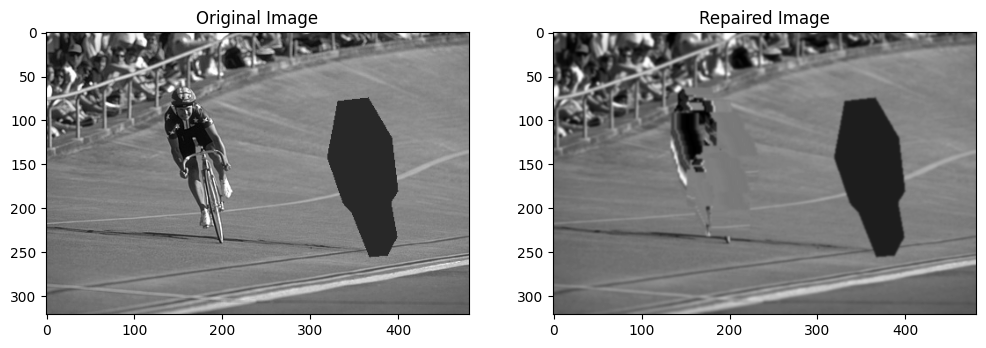

In [ ]:
import numpy as np
from skimage import io, color, filters, measure
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def segmentation(image_path):
    # Read the image
    image = io.imread(image_path)
    # Convert the image to grayscale
    grayscale_image = color.rgb2gray(image)
    # Apply Otsu's thresholding
    threshold = filters.threshold_otsu(grayscale_image)
    binary_image = (grayscale_image > threshold).astype(int)
    # Find the contours in the binary image
    contours = measure.find_contours(binary_image, 0.5)
    # Assuming the largest contour is the target region
    target_contour = max(contours, key=lambda x: len(x))
    # Create a mask for the target region
    mask = np.zeros_like(grayscale_image, dtype=bool)
    mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True
    return grayscale_image, mask, target_contour

def specify_similar_patches(image, target_contour, reference_patch, similarity_threshold=0.7, radius=20, num_patches=5):
    similar_patches = []
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)
    # Iterate through the target region to find similar patches
    for _ in range(num_patches):
        x = np.random.randint(x_min - radius, x_max - reference_patch.shape[1] + radius)
        y = np.random.randint(y_min - radius, y_max - reference_patch.shape[0] + radius)
        patch = image[y:y + reference_patch.shape[0], x:x + reference_patch.shape[1]]
        # Calculate similarity using mean squared error
        if patch.shape == reference_patch.shape:
            mse = np.mean(np.square(patch - reference_patch))
            if mse < similarity_threshold:
                similar_patches.append(patch)
    # If no suitable patch is found, return an empty list
    return similar_patches

def repair_target_patch(image, target_contour, similar_patches):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Ensure the bounding box is within the image dimensions
    height, width = image.shape
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, width)
    y_max = min(y_max, height)

    # Create a mask for the target region
    target_mask = np.zeros_like(image, dtype=bool)
    target_mask[np.round(target_contour[:,0]).astype(int), np.round(target_contour[:,1]).astype(int)] = True

    # Repair the target patch using the similar patches
    repaired_image = image.copy()
    for y in range(y_min, y_max):
        for x in range(x_min, x_max):
            if target_mask[y, x]:
                # Find the most similar patch to the target patch
                target_patch = image[y:y+32, x:x+32]
                patch_distances = [np.mean(np.square(target_patch - patch[:target_patch.shape[0], :target_patch.shape[1]])) for patch in similar_patches]
                most_similar_patch = similar_patches[np.argmin(patch_distances)]
                # Copy the most similar patch to the target region
                repaired_image[y:y+target_patch.shape[0], x:x+target_patch.shape[1]] = most_similar_patch[:target_patch.shape[0], :target_patch.shape[1]]

    # Apply Gaussian smoothing to blend the repaired region
    repaired_image = gaussian_filter(repaired_image, sigma=1.0)
    return repaired_image

# Example usage
image_path = '22.png'
grayscale_image, mask, target_contour = segmentation(image_path)

# Reference patch (replace this with your desired reference patch)
reference_patch = np.zeros((32, 32))

similar_patches = specify_similar_patches(grayscale_image, target_contour, reference_patch)

if similar_patches:
    print(f"Found {len(similar_patches)} similar patches:")
    # Repair the target patch using the similar patches
    repaired_image = repair_target_patch(grayscale_image, target_contour, similar_patches)

    # Display the original and repaired images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(grayscale_image, cmap='gray')
    ax1.set_title('Original Image')
    ax2.imshow(repaired_image, cmap='gray')
    ax2.set_title('Repaired Image')
    plt.show()
else:
    print("No similar patches found in the target region.")


In [ ]:
def specify_similar_patch(image, target_contour, reference_patch, similarity_threshold=0.7):
    # Get the bounding box of the target contour
    x_min, y_min = np.floor(np.min(target_contour, axis=0)).astype(int)
    x_max, y_max = np.ceil(np.max(target_contour, axis=0)).astype(int)

    # Reshape the reference patch to a 1D vector
    reference_patch_vector = reference_patch.flatten()

    # Initialize NMF model
    nmf = NMF(n_components=1)

    # Iterate through the target region to find a similar patch
    best_similarity = 0
    best_patch = None
    for x in range(x_min, x_max - reference_patch.shape[1] + 1):
        for y in range(y_min, y_max - reference_patch.shape[0] + 1):
            patch = image[y:y + reference_patch.shape[0], x:x + reference_patch.shape[1]]
            # Reshape the patch to a 1D vector
            patch_vector = patch.flatten()

            # Check if the patch has at least one feature
            if patch_vector.size > 0:
                # Fit NMF model to the patch vector
                W = nmf.fit_transform(patch_vector.reshape(1, -1))
                H = nmf.components_

                # Calculate similarity using the reconstruction error
                similarity = 1 - np.linalg.norm(patch_vector - np.dot(W, H), ord=2) / np.linalg.norm(patch_vector, ord=2)

                if similarity > best_similarity and similarity >= similarity_threshold:
                    best_similarity = similarity
                    best_patch = patch
            else:
                continue

    # If no suitable patch is found, return None
    return best_patch


In [ ]:
from PIL import Image
import numpy as np

# Read input image as grayscale
input_image = Image.open('22.png').convert('L')
input_data = np.array(input_image)

# User-supplied grayscale color value for the mask
mask_color = 128

# Create a mask for the target region (Ω) using the mask color
mask = input_data == mask_color

# Define the source region (Φ) as the entire image minus the target region
source_mask = np.invert(mask)

# Apply the mask to the input image
target_region = input_data.copy()
target_region[mask] = 255  # Set masked pixels to white for visualization
target_region = Image.fromarray(target_region)

# Fill the target region with a solid color (e.g., black)
filled_image = input_data.copy()
filled_image[mask] = 0  # Fill masked pixels with black
filled_image = Image.fromarray(filled_image)

# Display the target region and the filled image
target_region.show()
filled_image.show()

In [ ]:

# Load the image and convert it to grayscale
img = Image.open('flowers.jpeg').convert('L')
img_array = np.array(img)

# Apply PCA to the image
n_components = 10  # Number of components to keep
pca = PCA(n_components=n_components)
img_pca = pca.fit_transform(img_array)

# Reconstruct the image from the PCA-transformed data
img_reconstructed = pca.inverse_transform(img_pca)

# Define the "goal patch" with scratches (for demonstration, let's use a simple scratch pattern)
goal_patch_size = 15
goal_patch = np.zeros((goal_patch_size, goal_patch_size))
goal_patch[7, 7] = 255  # Scratch in the middle

# Function to extract patches from the image
def extract_patches(img, patch_size):
    height, width = img.shape
    patches = []
    for i in range(height - patch_size + 1):
        for j in range(width - patch_size + 1):
            patch = img[i:i+patch_size, j:j+patch_size]
            patches.append(patch.flatten())
    return np.array(patches)

# Extract patches from the reconstructed image
patches = extract_patches(img_reconstructed, goal_patch_size)

# Flatten the goal patch for comparison
goal_patch_flat = goal_patch.flatten()

# Calculate the Euclidean distance between the goal patch and all patches
distances = cdist([goal_patch_flat], patches, 'euclidean')[0]

# Find the indices of the 10 most similar patches
similar_patch_indices = np.argsort(distances)[:10]
print(similar_patch_indices)
# Visualize the original image, the goal patch, and the similar patches
plt.figure(figsize=(15, 10))

plt.subplot(2, 6, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('on')

plt.subplot(2, 6, 2)
plt.imshow(goal_patch, cmap='gray')
plt.title('Goal Patch')
plt.axis('on')

for i, idx in enumerate(similar_patch_indices, start=3):
    plt.subplot(2, 6, i)
    patch = patches[idx].reshape((goal_patch_size, goal_patch_size))
    plt.imshow(patch, cmap='gray')
    plt.title(f'Similar Patch {i-2}')
    plt.axis('on')

plt.tight_layout()

plt.show()

# Jadidi

## PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

# Load the image and convert it to grayscale
img = Image.open('parrots.jpeg').convert('L')

# Convert the image to a numpy array
img_array = np.array(img)

# Flatten the image array to have one column per pixel
img_array_flat = img_array.reshape(-1, 1)

# Apply PCA to get the low-rank component
pca = PCA()
pca.fit(img_array_flat)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 95)
print("Number of components explaining 95% variance: " + str(k))

# Define a function to plot the image at a given number of components
def plot_at_k(k):
    pca = PCA(n_components=k)
    image_recon = pca.inverse_transform(pca.fit_transform(img_array_flat))
    plt.imshow(image_recon.reshape(img_array.shape), cmap=plt.cm.gray)

# Plot the image at different numbers of components
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15, 9])

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plot_at_k(ks[i])
    plt.title("Components: " + str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# Calculate the low-rank component
n_components = 10  # You can change the number of components
pca = PCA(n_components=n_components)
low_rank_component = pca.fit_transform(img_array_flat)

# Reshape the low-rank component to the original image shape
low_rank_component = pca.inverse_transform(low_rank_component).reshape(img_array.shape)

# Calculate the sparse component
sparse_component = img_array_flat.reshape(img_array.shape) - low_rank_component

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(low_rank_component, cmap='gray')
plt.title('Low-Rank Component')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sparse_component, cmap='gray')
plt.title('Sparse Component')
plt.axis('off')

plt.tight_layout()
plt.show()